In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

In [10]:
data_dir  = '/home/mgricci/data/phase2vec/simple_oscillator_par_noise'
data_fn   = os.path.join(data_dir, 'X_train.npy')
labels_fn = os.path.join(data_dir, 'y_train.npy')

data   = np.load(data_fn)
labels = np.load(labels_fn)

num_data = data.shape[0]
num_vis = 16
vis_inds = np.random.permutation(num_data)[:num_vis]

vis_data = [data[ind] for ind in vis_inds]
vis_labels = [labels[ind] for ind in vis_inds]

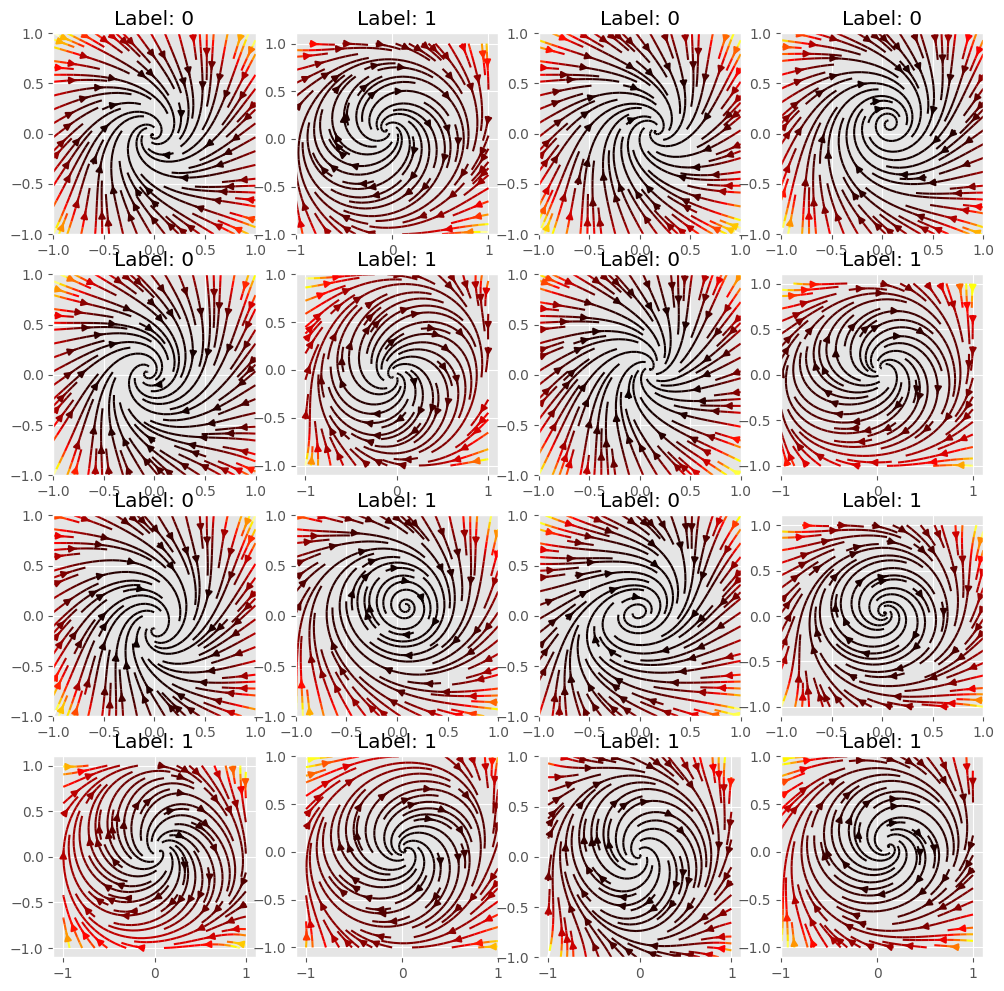

In [11]:
fig, axes = plt.subplots(4,4,figsize=(12,12))

x = np.linspace(-1.0,1.0,64)

for datum, label, ax in zip(vis_data, vis_labels, axes.reshape(-1)):
    ax.streamplot(x,x,datum[1],datum[0],color=(datum**2).sum(0), cmap='hot')
    ax.set_title(f'Label: {label}')
plt.show()
plt.close()

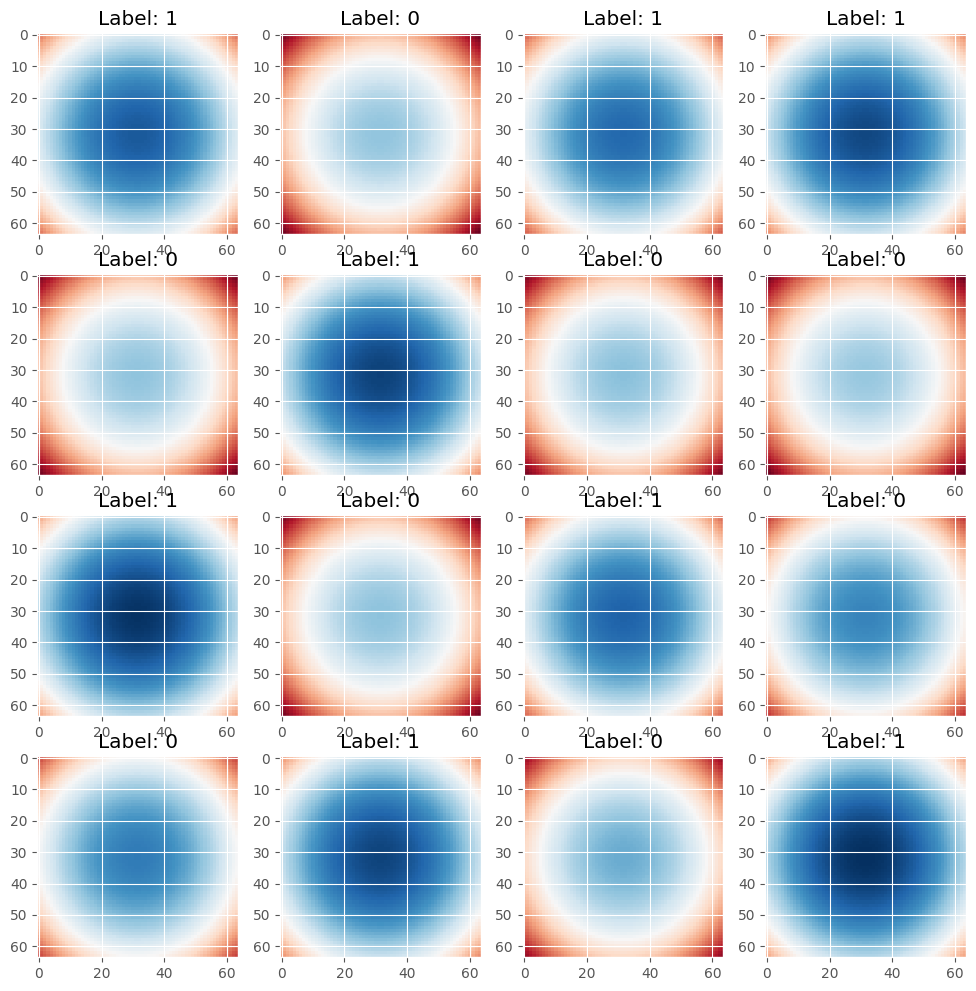

In [19]:
import torch
from src.data._utils import divergence, laplacian, jacobian, curl

fig, axes = plt.subplots(4,4,figsize=(12,12))

Ds = divergence(torch.tensor(vis_data),spacings=(torch.tensor(x),torch.tensor(x)))
vmin = Ds.min()
vmax = Ds.max()
for datum, label, ax in zip(Ds, vis_labels, axes.reshape(-1)):
    ax.imshow(datum,cmap='RdBu', vmin=vmin, vmax=vmax)
    ax.set_title(f'Label: {label}')
plt.show()
plt.close()

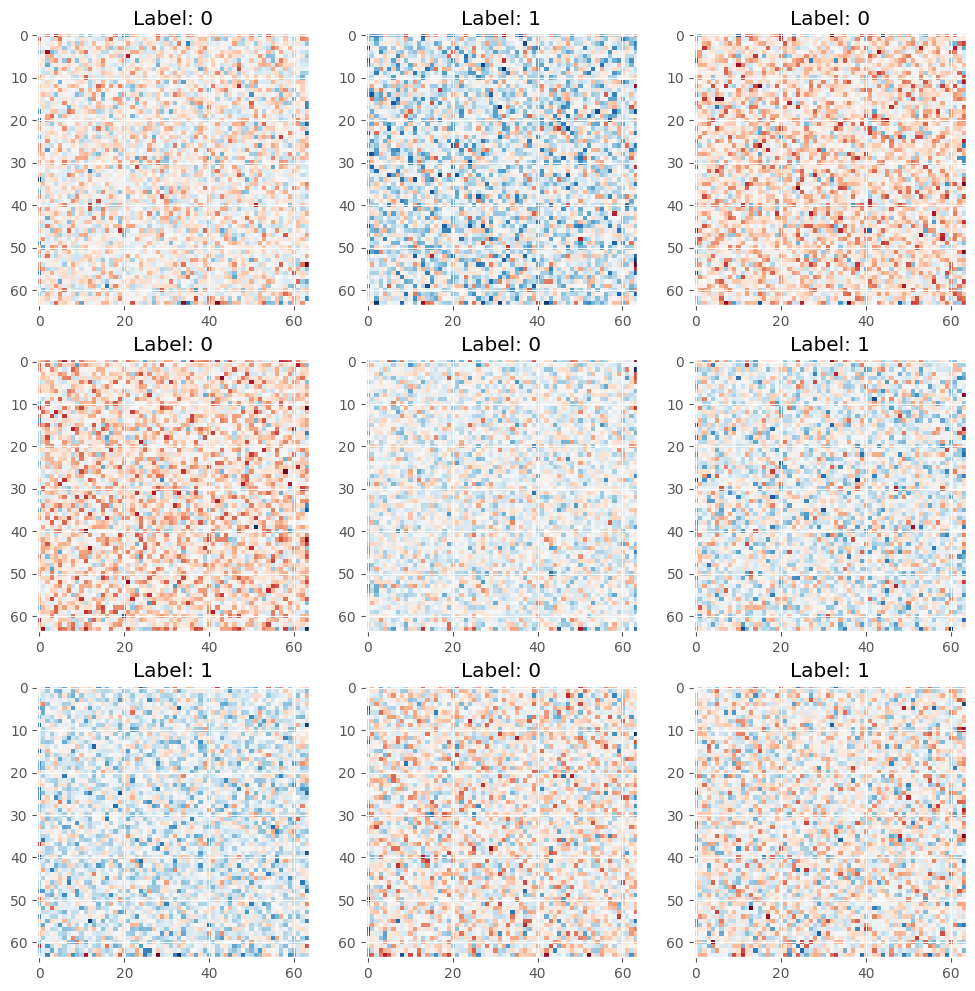

In [14]:
fig, axes = plt.subplots(3,3,figsize=(12,12))

Cs = curl(torch.tensor(vis_data),spacings=(torch.tensor(x),torch.tensor(x)))
for datum, label, ax in zip(Cs, vis_labels, axes.reshape(-1)):
    ax.imshow(datum[-1,...,0],cmap='RdBu')
    ax.set_title(f'Label: {label}')
plt.show()
plt.close()